Single Object detection and segmentation using UNet from scratch

> By: Mohamed Ahmed Mustafa



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [ ]:
!ls

'AI Assessments'			      mitochondria
'AI Assessment Submission'		     'MohamedAhmedMustafa - AI - CV.docx.pdf'
'Colab Notebooks'			     'MohamedAhmedMustafa - AI - CV.docx.pdf - UDT.pdf'
'Copy of mitochondria.zip'		     'MohamedAhmedMustafa - AI - CV - New.docx'
'Copy of projectdata.xlsx - sheet 1.gsheet'  'Mohamed_Ahmed_Mustafa - AI - CV.pdf'
 cv					     'MohamedAhmedMustafa - AI - CV.pdf'
 CV_Coverletter.pdf			     'MohamedAhmedMustafa - CV.pdf'
 CV_COVERLETTER.pdf			     'Mohamed Ahmed Mustafa.docx'
'ECG Project'				      MyAICV.pdf
'Group2 - Smart Hospital '		     'My stuff'
'Group2 - Smart Hospital - Final.pptx'	     'New Text Document.txt'
'Group2-smart hospital.pptx'		      waze_dataset.csv
'Group2-smart hospitals.pdf'		     'سيشن svm'
'Group2-smart hospitals.pptx'


In [ ]:
!unzip Copy\ of\ mitochondria.zip

Archive:  Copy of mitochondria.zip
replace mitochondria/images/image_109.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace mitochondria/images/image_44.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, concatenate
from sklearn.model_selection import train_test_split

In [ ]:
H_Size = 128
W_Size = 128

images = []
masks = []

for file in os.listdir("/content/drive/MyDrive/mitochondria/images"):
  img = cv2.imread("/content/drive/MyDrive/mitochondria/images/" + file, 0)
  img = cv2.resize(img, (H_Size, W_Size))
  img = img / 255.0
  images.append(img)

for file in os.listdir("/content/drive/MyDrive/mitochondria/masks"):
  mask = cv2.imread("/content/drive/MyDrive/mitochondria/masks/" + file, 0)
  mask = cv2.resize(mask, (H_Size, W_Size))
  mask = mask / 255.0
  masks.append(mask)

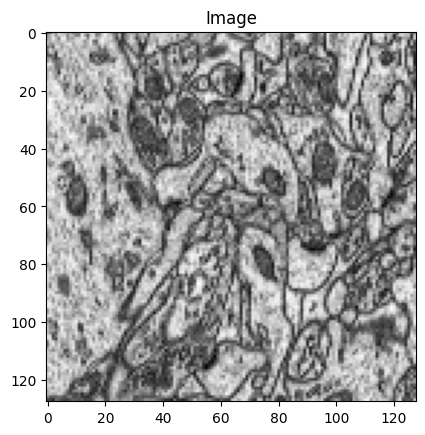

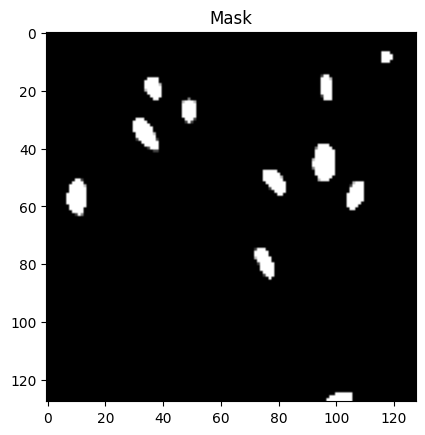

In [ ]:
plt.imshow(images[0], cmap = "grey") # Pass the image data directly
plt.title("Image") # Set the title separately
plt.show()
plt.imshow(masks[0], cmap = "grey") # Pass the image data directly
plt.title("Mask") # Set the title separately
plt.show()

In [ ]:
print(masks[0].shape)

(128, 128)


In [ ]:
def UNet(input_shape=(128, 128, 1)):

  inputs = Input(input_shape)
  c1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(inputs)
  c1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(c1)
  p1 = MaxPool2D(2)(c1)

  c2 = Conv2D(128, 3, activation = 'relu', padding = 'same')(p1)
  c2 = Conv2D(128, 3, activation = 'relu', padding = 'same')(c2)
  p2 = MaxPool2D(2)(c2)

  c3 = Conv2D(256, 3, activation = 'relu', padding = 'same')(p2)
  c3 = Conv2D(256, 3, activation = 'relu', padding = 'same')(c3)
  p3 = MaxPool2D(2)(c3)

  c4 = Conv2D(512, 3, activation = 'relu', padding = 'same')(p3)
  c4 = Conv2D(512, 3, activation = 'relu', padding = 'same')(c4)
  p4 = MaxPool2D(2)(c4)

  b1 = Conv2D(1024, 3, activation = 'relu', padding = 'same')(p4)
  b1 = Conv2D(1024, 3, activation = 'relu', padding = 'same')(b1)

  d1 = UpSampling2D(2)(b1)
  d1 = Conv2D(512, 3, activation = 'relu', padding = 'same')(d1)
  d1 = concatenate([d1, c4])
  d1 = Conv2D(512, 3, activation = 'relu', padding = 'same')(d1)
  d1 = Conv2D(512, 3, activation = 'relu', padding = 'same')(d1)

  d2 = UpSampling2D(2)(d1)
  d2 = Conv2D(256, 3, activation = 'relu', padding = 'same')(d2)
  d2 = concatenate([d2, c3])
  d2 = Conv2D(256, 3, activation = 'relu', padding = 'same')(d2)
  d2 = Conv2D(256, 3, activation = 'relu', padding = 'same')(d2)

  d3 = UpSampling2D(2)(d2)
  d3 = Conv2D(128, 3, activation = 'relu', padding = 'same')(d3)
  d3 = concatenate([d3, c2])
  d3 = Conv2D(128, 3, activation = 'relu', padding = 'same')(d3)
  d3 = Conv2D(128, 3, activation = 'relu', padding = 'same')(d3)

  d4 = UpSampling2D(2)(d3)
  d4 = Conv2D(64, 3, activation = 'relu', padding = 'same')(d4)
  d4 = concatenate([d4, c1])
  d4 = Conv2D(64, 3, activation = 'relu', padding = 'same')(d4)
  d4 = Conv2D(64, 3, activation = 'relu', padding = 'same')(d4)

  outputs = Conv2D(1, 1, activation = 'sigmoid')(d4)

  model = tf.keras.Model(inputs, outputs)

  return model


In [ ]:
model = UNet()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 128, 128, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_278 (Conv2D)       │ (None, 128, 128, 64)   │            640 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_279 (Conv2D)       │ (None, 128, 128, 64)   │         36,928 │ conv2d_278[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_56          │ (None, 64, 64, 64)     │              0 │ conv2d_279[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_280 (Conv2D)       │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_56[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_281 (Conv2D)       │ (None, 64, 64, 128)    │        147,584 │ conv2d_280[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_57          │ (None, 32, 32, 128)    │              0 │ conv2d_281[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_282 (Conv2D)       │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_57[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_283 (Conv2D)       │ (None, 32, 32, 256)    │        590,080 │ conv2d_282[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_58          │ (None, 16, 16, 256)    │              0 │ conv2d_283[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_284 (Conv2D)       │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_58[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_285 (Conv2D)       │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_284[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_59          │ (None, 8, 8, 512)      │              0 │ conv2d_285[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_286 (Conv2D)       │ (None, 8, 8, 1024)     │      4,719,616 │ max_pooling2d_59[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_287 (Conv2D)       │ (None, 8, 8, 1024)     │      9,438,208 │ conv2d_286[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_56          │ (None, 16, 16, 1024)   │              0 │ conv2d_287[0][0]       │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_288 (Conv2D)  

 Total params: 34,512,193 (131.65 MB)

 Trainable params: 34,512,193 (131.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size = 0.1, random_state = 42)

In [ ]:
history = model.fit(np.array(X_train), np.array(y_train), batch_size = 8, epochs = 20, validation_data = (np.array(X_test), np.array(y_test)))

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 511ms/step - accuracy: 0.7813 - loss: 0.6658 - val_accuracy: 0.9364 - val_loss: 0.2134
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.9405 - loss: 0.2033 - val_accuracy: 0.9364 - val_loss: 0.1972
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9399 - loss: 0.1854 - val_accuracy: 0.9364 - val_loss: 0.1749
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.9428 - loss: 0.1412 - val_accuracy: 0.9364 - val_loss: 0.2461
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9421 - loss: 0.1734 - val_accuracy: 0.9407 - val_loss: 0.1294
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.9516 - loss: 0.1077 - val_accuracy: 0.9545 - val_loss: 0.1073
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9608 - loss: 0.0885 - val_accuracy: 0.9600 - val_loss: 0.0874
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.9640 - loss: 0.0791 - val_accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


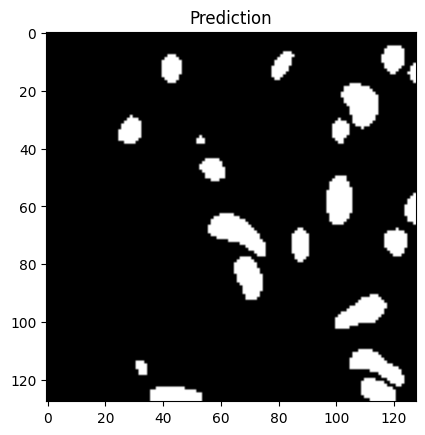

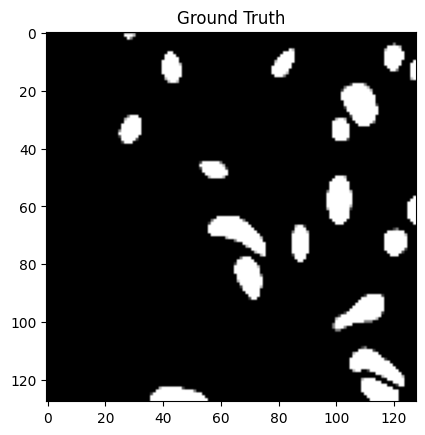

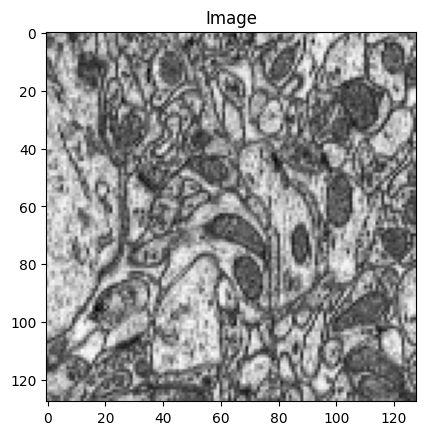

In [ ]:
pred = model.predict(np.array(X_test))
pred_threshold = (pred > 0.5).astype(np.uint8)
# print(pred_threshold[0])
# print(y_test[0])
plt.imshow(pred_threshold[1], cmap = "gray")
plt.title("Prediction")
plt.show()
plt.imshow(y_test[1], cmap = "gray")
plt.title("Ground Truth")
plt.show()
plt.imshow(X_test[1], cmap = "gray")
plt.title("Image")
plt.show()

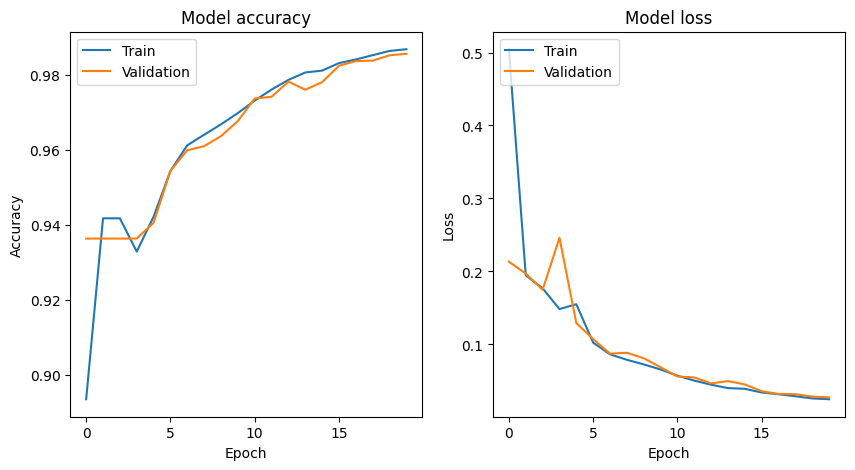

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()